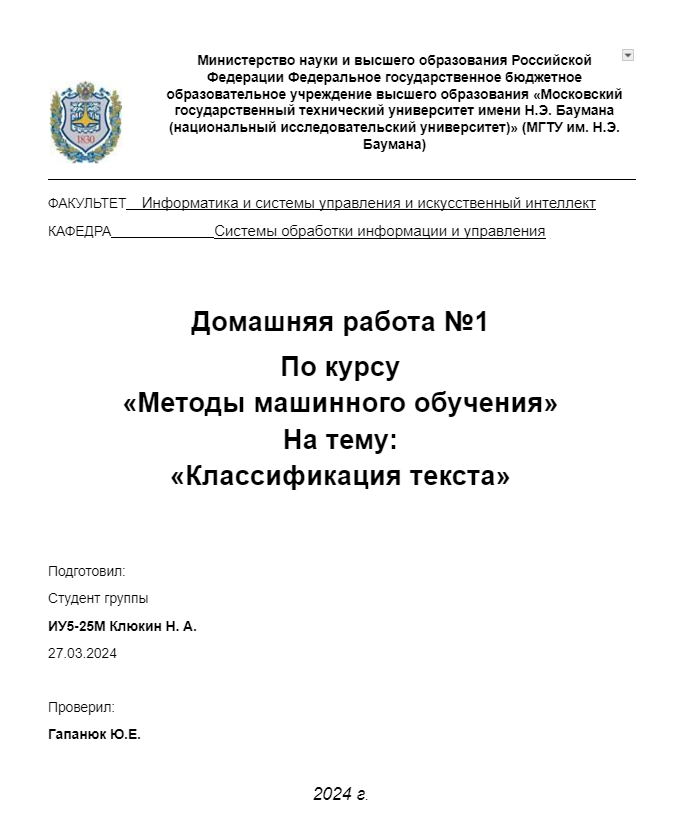

- **Цель домашней работы**: 

# Задание

- Для произвольного набора данных, предназначенного для классификации текстов, решите задачу классификации текста двумя способами:
    - Способ 1. На основе CountVectorizer или TfidfVectorizer.
    - Способ 2. На основе моделей word2vec или Glove или fastText.
- Сравните качество полученных моделей.

# Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Подгрузка датасета и подготовительные действия

- Используем набор Depressive/Non-Depressive Tweets Data - Депрессивные/недепрессивные твиты в период с декабря 2019 года по декабрь 2020 года

In [5]:
# Загрузка данных
df = pd.read_csv("datasets/clean_tweet.csv")

# Удаление первой колонки
df = df.drop(df.columns[0], axis=1)
df = df.rename(columns={'sentiment': 'value'})

df.head()

,text,value
0,text,0
1,rising cases of covid does not alarm me rising...,1
2,please vote for chicagoindiaresolution marking...,0
3,wishing all of you eidaladha hazrat ibrahim as...,1
4,daily coronavirus cases in india top for first...,1


In [6]:
df.shape

(134348, 2)

Датасет слишком большой, а также содержит пропуски. Возьмём часть и проведем очистку данных

In [7]:
df = df.sample(frac=0.05)
df = df.dropna()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['value'], test_size=0.2, random_state=42)

## 1. Решение задачи классификации текстов с использованием классификатора SVC на основе TfidfVectorizer

In [9]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [10]:
svc_classifier_tfidf = SVC()

In [11]:
svc_classifier_tfidf.fit(X_train_tfidf, y_train)

SVC()

In [12]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
svc_accuracy = svc_classifier_tfidf.score(X_test_tfidf, y_test)
print(f'Точность для метода векторизации TfidfVectorizer через классификатор SVC = {svc_accuracy}')

Точность для метода векторизации TfidfVectorizer через классификатор SVC = 0.8227848101265823


# 2. На основе модели word2vec

In [13]:
from gensim.models import word2vec
import re
import pandas as pd
import numpy as np
from typing import Dict, Tuple
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NKliukin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Подготовим корпус
corpus = []
stop_words = stopwords.words('english')
tok = WordPunctTokenizer()
for line in df['text'].values:
    line1 = line.strip().lower()
    line1 = re.sub("[^a-zA-Z]"," ", line1)
    text_tok = tok.tokenize(line1)
    text_tok1 = [w for w in text_tok if not w in stop_words]
    corpus.append(text_tok1)

In [15]:
corpus[:5]

[['ive',
  'killed',
  'two',
  'snake',
  'plants',
  'year',
  'ashamed',
  'requires',
  'literally',
  'zero',
  'none',
  'care',
  'parents',
  'expecting',
  'get',
  'married',
  'take',
  'care',
  'whole',
  'ass',
  'fam',
  'nice'],
 ['month',
  'may',
  'almost',
  'sucked',
  'nigga',
  'dry',
  'june',
  'pls',
  'nice',
  'want',
  'seeing',
  'month',
  'congratulations',
  'application',
  'successful',
  'admitted',
  'countless',
  'credit',
  'alerts',
  'amen',
  'rt',
  'claim'],
 ['mr',
  'modi',
  'india',
  'saved',
  'world',
  'disaster',
  'bringing',
  'covid',
  'control',
  'months',
  'later',
  'virus',
  'ravaging',
  'india',
  'things',
  'spiralled',
  'control',
  'public',
  'health',
  'system',
  'teetered',
  'verge',
  'collapse',
  'vaccination',
  'drive',
  'tatters'],
 ['pandas',
  'hope',
  'still',
  'fine',
  'seems',
  'impossible',
  'cb',
  'month',
  'let',
  'patient',
  'wait',
  'ya',
  'leave',
  'yet'],
 ['eula',
  'normal',
 

In [16]:
# количество текстов в корпусе не изменилось и соответствует целевому признаку
assert df.shape[0]==len(corpus)

In [17]:
%time model = word2vec.Word2Vec(corpus, workers=4, min_count=10, window=10, sample=1e-3)

CPU times: total: 1.03 s
Wall time: 449 ms


In [18]:
# Проверим, что модель обучилась
print(model.wv.most_similar(positive=['inside'], topn=5))

[('men', 0.9990586638450623), ('talk', 0.9990313649177551), ('yet', 0.9989964962005615), ('justiceformanisha', 0.9989763498306274), ('brilliant', 0.9989488124847412)]


In [19]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)


In [20]:
class EmbeddingVectorizer(object):
    '''
    Для текста усредним вектора входящих в него слов
    '''
    def __init__(self, model):
        self.model = model
        self.size = model.vector_size

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean(
            [self.model[w] for w in words if w in self.model] 
            or [np.zeros(self.size)], axis=0)
            for words in X])

In [21]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [23]:
sentiment(EmbeddingVectorizer(model.wv), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.0
1 	 1.0


# Подведение результатов

Таким образом, можно заключить, что наилучшие результаты были получены с использованием модели word2vec, что свзязано с тем, что эта модель использует нейронные сети, которые позволяют более гибко проводить классификацию.